In [53]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn import metrics
from itertools import cycle

# Show me all of the columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.set()
%matplotlib inline

# The Boston Marathon Challenge

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [5]:
df = pd.read_csv('https://github.com/llimllib/bostonmarathon/raw/master/results/2014/results.csv')

In [16]:
df.describe(include='all')
df.head(15)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,Unknown,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,Unknown,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,Unknown,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,Unknown,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,Unknown,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,Unknown,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,Unknown,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,Unknown,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,Unknown,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


### Data cleaning

In [11]:
# Identifying nulls and handling unknowns
df.info()
df.isnull().sum()*100/len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


10k           0.000000
name          0.000000
division      0.000000
25k           0.000000
gender        0.000000
age           0.000000
official      0.000000
bib           0.000000
genderdiv     0.000000
ctz          96.110555
35k           0.000000
overall       0.000000
pace          0.000000
state         8.054027
30k           0.000000
5k            0.000000
half          0.000000
20k           0.000000
country       0.000000
city          0.003127
40k           0.000000
dtype: float64

In [17]:
# Let's drop 'ctz', insert 'Unknown' for states that aren't filled in, and impute the one unknown city with the mode

df.state.fillna(('Unknown'),inplace=True)
df.drop(('ctz'),axis=1, inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)

# We also notice that there are -'s, which we will replace with the value 0

df = df.replace(to_replace='-', value='0')

In [18]:
# Changing categorical variables (M and F for male and female) into ordinal variables

df['is_male'] = np.where(df['gender'] == 'M', 1, 0)

# There are 3 types of bibs: ones that start with F + a unique number, ones that start with W + a unique number
# and ones with no letter and a unique number. These groups would be Female, Wheelchair, and Male (non-wheelchair),
# respectively

df.loc[:, 'f_bib'] = 0
df.loc[df.bib.str.contains('F'), 'f_bib'] = 1

df.loc[:, 'w_bib'] = 0
df.loc[df.bib.str.contains('W'), 'w_bib'] = 1

mask = ((df.bib.str.contains('W')) | (df.bib.str.contains('F')))

df.loc[:, 'num_bib'] = 0
df.loc[~mask, 'num_bib'] = 1

# Converting times to floats 

for col in df[['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k']]:
    df[col] = df[col].astype('float')

In [19]:
df.head(15)

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,is_male,f_bib,w_bib,num_bib
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,Unknown,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,1,0,1,0
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,Unknown,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,0,1,0,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,Unknown,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,1,0,1,0
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,Unknown,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,0,1,0,0
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,Unknown,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,1,0,1,0
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,116.37,28,5.37,Unknown,99.33,16.22,69.47,65.83,KEN,Nandi,132.95,0,1,0,0
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,70.23,4,3.23,Unknown,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83,1,0,1,0
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,107.47,5,4.97,Unknown,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80,1,0,0,1
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,3,3.10,Unknown,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70,1,0,1,0
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,1,0,0,1


## Creating the Model

In [56]:
# Splitting data for better run time

df1, df2 = train_test_split(df, test_size=0.90, random_state=42)
X = df1.loc[:, ['5k','10k','20k','half','25k','30k','35k','40k','official','age','is_male']]
X.dropna(inplace=True)
X_norm = normalize(X)

Text(0, 0.5, 'WCSS')

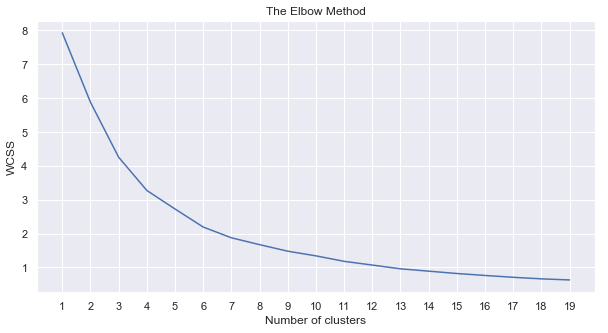

In [57]:
# Using the elbow method to find the optimal number of centroids/clusters

wcss = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xticks(np.arange(1,20,step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The 'elbow' appears to fall at 4, or maybe 5, so we will choose 4 for the number of clusters.

In [58]:
km = KMeans(4)
km.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
y_pred = km.predict(X_norm)
y_pred.shape
df.shape

(31984, 25)

In [60]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,is_male,f_bib,w_bib,num_bib,cluster
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.718298,1932.563032,132.709723,42.407079,242.997314,8051.044741,196.648339,15939.587825,9.275658,164.365402,25.713685,111.413195,105.543107,228.722255,0.550807,0.001501,0.001657,0.996842,0.605709
std,9.189281,1715.228694,27.758446,11.316496,52.300431,4754.005626,42.444377,9232.978224,1.992486,34.427329,4.447068,21.692902,20.209809,49.775681,0.497420,0.038711,0.040674,0.056107,0.917791
min,0.000000,1.000000,0.000000,18.000000,80.600000,1.000000,0.000000,1.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,610.000000,115.100000,33.000000,205.527500,3972.000000,167.050000,7943.750000,7.850000,140.580000,22.630000,96.750000,91.700000,193.700000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.320000,1425.000000,128.670000,42.000000,232.370000,7970.000000,188.120000,15939.500000,8.870000,157.700000,25.080000,107.775000,102.100000,218.780000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,57.150000,2611.000000,147.555000,50.000000,273.235000,11968.000000,220.120000,23935.250000,10.430000,182.785000,28.455000,123.030000,116.480000,257.405000,1.000000,0.000000,0.000000,1.000000,2.000000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000,1.000000,1.000000,1.000000,1.000000,3.000000


Let's use PCA to reduce the data to two variables that we can work with more easily

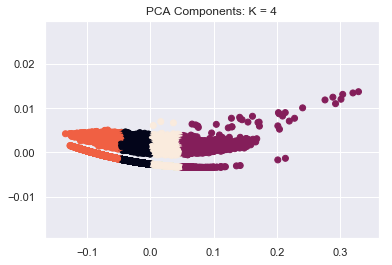

In [69]:
X = df.loc[:, ['official','age','is_male']]
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

# Get cluster assignments with k=4

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)


# Plot PCA components and clusters

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('PCA Components: K = 4')
plt.show()


# Check the solution against the data.
# print('Comparing k-means clusters against the data:')
# print(pd.crosstab(y_pred, y))


Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3
row_0                        
0      2100     0     0  8156
1         0  5999     0  1996
2         0     0  5814     0
3      7146     0   773     0


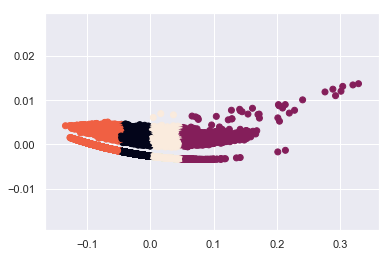

In [64]:
# Each batch will be made up of 500 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=500)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [67]:
df.corr()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,is_male,f_bib,w_bib,num_bib,cluster
10k,1.000000,0.457038,0.778816,0.163271,0.898462,0.775604,0.906092,0.874791,0.898558,0.926809,0.963261,0.950589,0.953914,0.871696,-0.262733,-0.066349,-0.134263,0.143111,0.225540
division,0.457038,1.000000,0.430179,-0.577256,0.515368,0.470752,0.504534,0.514493,0.515633,0.492966,0.454344,0.467029,0.467880,0.508014,-0.125786,-0.043287,-0.045522,0.062867,0.301208
25k,0.778816,0.430179,1.000000,0.135917,0.774548,0.709651,0.791223,0.796723,0.776414,0.801507,0.766526,0.782167,0.806909,0.805845,-0.229755,-0.057477,-0.107706,0.117737,0.268877
age,0.163271,-0.577256,0.135917,1.000000,0.166440,0.306829,0.153918,0.201129,0.166593,0.153044,0.156280,0.158288,0.160633,0.156482,0.208802,-0.031443,-0.027958,0.041962,0.059575
official,0.898462,0.515368,0.774548,0.166440,1.000000,0.878360,0.975911,0.954233,0.999897,0.959883,0.875720,0.925348,0.922466,0.962319,-0.204402,-0.063107,-0.106164,0.120504,0.480276
genderdiv,0.775604,0.470752,0.709651,0.306829,0.878360,1.000000,0.843499,0.909206,0.878789,0.821153,0.763285,0.786785,0.788970,0.853469,0.166793,-0.065368,-0.068840,0.095006,0.520524
35k,0.906092,0.504534,0.791223,0.153918,0.975911,0.843499,1.000000,0.929613,0.976852,0.975266,0.880755,0.933299,0.937077,0.960374,-0.226927,-0.060641,-0.103198,0.116652,0.412995
overall,0.874791,0.514493,0.796723,0.201129,0.954233,0.909206,0.929613,1.000000,0.954765,0.913311,0.860468,0.883483,0.888320,0.932033,-0.246634,-0.064745,-0.070216,0.095574,0.477886
pace,0.898558,0.515633,0.776414,0.166593,0.999897,0.878789,0.976852,0.954765,1.000000,0.960339,0.875903,0.925328,0.922885,0.964962,-0.204713,-0.063169,-0.106270,0.120624,0.479964
30k,0.926809,0.492966,0.801507,0.153044,0.959883,0.821153,0.975266,0.913311,0.960339,1.000000,0.900208,0.951619,0.960423,0.943563,-0.241531,-0.060420,-0.107006,0.119260,0.356449
